

**I am using a winequality dataset which have 1599 rows and 13 columns. firstly i will try to reduce the features using PCA**


In [208]:
import matplotlib.pyplot as plt

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [210]:
data= pd.read_csv('/content/winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
scalar=StandardScaler()
scalar.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [213]:

scaled_data=scalar.transform(data)

In [214]:
from sklearn.decomposition import PCA

In [215]:
pca=PCA(n_components=2)

In [216]:

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [217]:

x_pca=pca.transform(scaled_data)

In [218]:
scaled_data.shape

(1599, 12)

In [219]:
df=pd.DataFrame(x_pca,columns=['pca1','pca2'])


In [220]:
df['quality']=data['quality']

In [221]:
df

,pca1,pca2,quality
0,-1.779442,1.157303,5
1,-1.004185,2.071838,5
2,-0.915783,1.393434,5
3,2.404077,-0.213792,6
4,-1.779442,1.157303,5
...,...,...,...
1594,-2.241991,0.599594,5
1595,-2.122456,-0.370101,6
1596,-1.366265,-0.517561,6
1597,-2.367147,0.703545,5


After reducing the features , I am using scatter plot for visualization

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


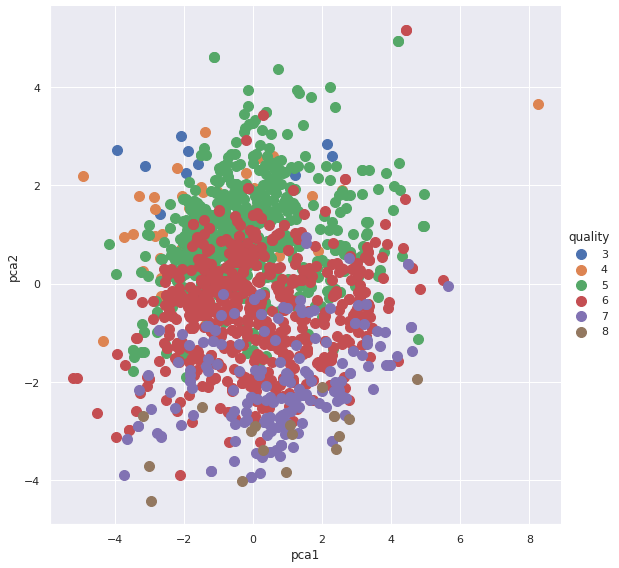

In [222]:
import seaborn as sn
sn.FacetGrid(df,hue="quality",size=8).map(plt.scatter,"pca1","pca2",s=100).add_legend()

After Applying a PCA reduced the features 

In [223]:
x_pca.shape

(1599, 2)

For clustring analysis , i am using K Mean analysis for that first we have to know how many clusters will be formed for that we will use elbow method

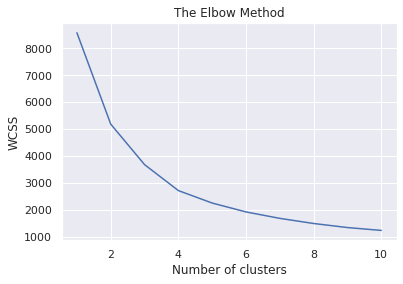

In [224]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=df.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 ... 0 0 3]


In [226]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

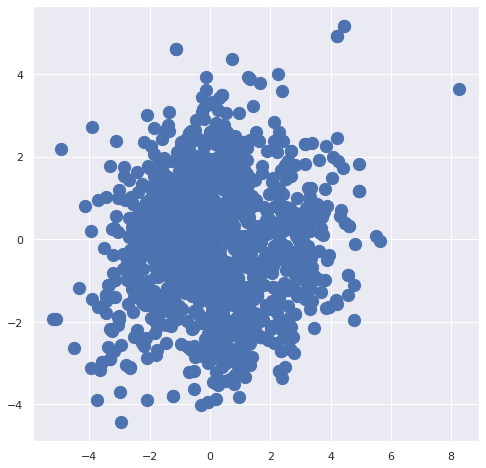

In [227]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(df['pca1'],df['pca2'],s=150)
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()

In [228]:
x = df.iloc[:,0:2] 
x

,pca1,pca2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
...,...,...
1594,-2.241991,0.599594
1595,-2.122456,-0.370101
1596,-1.366265,-0.517561
1597,-2.367147,0.703545


In [229]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [230]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 2, 2, 1], dtype=int32)

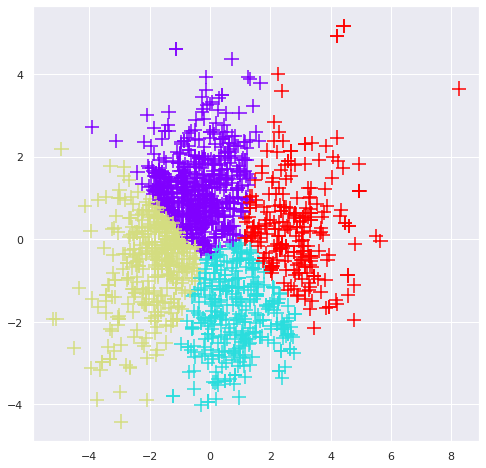

In [231]:

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['pca1'],data_with_clusters['pca2'],c=data_with_clusters['Clusters'],s=200,marker='+',cmap='rainbow')


In [232]:
df

,pca1,pca2,quality
0,-1.779442,1.157303,5
1,-1.004185,2.071838,5
2,-0.915783,1.393434,5
3,2.404077,-0.213792,6
4,-1.779442,1.157303,5
...,...,...,...
1594,-2.241991,0.599594,5
1595,-2.122456,-0.370101,6
1596,-1.366265,-0.517561,6
1597,-2.367147,0.703545,5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


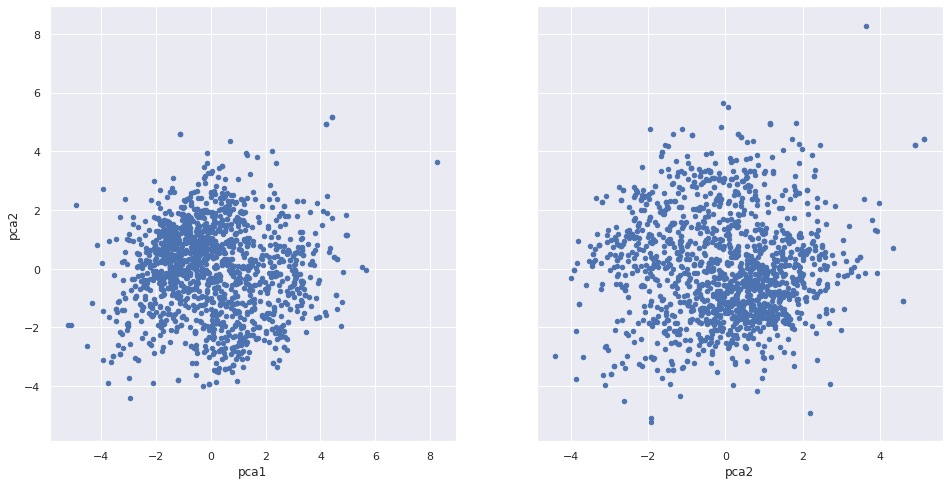

In [233]:
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='pca1', y='pca2', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='pca2', y='pca1', ax=axs[1])

In [234]:
x=df.iloc[:,:2]
y=df.iloc[:,2]

In [ ]:
x

,pca1,pca2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
...,...,...
1594,-2.241991,0.599594
1595,-2.122456,-0.370101
1596,-1.366265,-0.517561
1597,-2.367147,0.703545


In [235]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Here we are applying linear regression on this model


In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [237]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
y_pred=regressor.predict(X_test)

In [239]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

after we are applying linear regression model we found that we are getting very low efficacy

In [240]:
score

0.5252229125479815

Using Logistic Regression


In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
model= LogisticRegression()

In [245]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
model.predict(X_test)

array([6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 7, 6,
       6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 7, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 7, 7, 5, 7, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [247]:
model.score(X_test,Y_test)

0.7375

we are getting a 0.7375 score on the same dataset using logistic regression




In [248]:
model.predict_proba(X_test)

array([[3.68947248e-05, 5.53828181e-03, 4.24382303e-01, 5.33817499e-01,
        3.61485560e-02, 7.64662595e-05],
       [9.81792914e-03, 8.09034920e-02, 7.92600322e-01, 1.16009416e-01,
        6.68426835e-04, 4.13647296e-07],
       [3.23188639e-08, 2.59133222e-05, 3.29789619e-03, 2.29685709e-01,
        6.84562596e-01, 8.24278536e-02],
       ...,
       [3.44694501e-06, 7.56830262e-04, 4.55805244e-02, 6.08551616e-01,
        3.34962114e-01, 1.01454687e-02],
       [8.07604610e-03, 7.45829717e-02, 7.88607947e-01, 1.27907928e-01,
        8.24559592e-04, 5.47359132e-07],
       [1.47837148e-07, 7.28149516e-05, 6.57674321e-03, 3.16037851e-01,
        6.17538809e-01, 5.97736348e-02]])